Author: Sean Tulin
<br>
Date: Jan. 12, 2021
<br>
PHYS 2030 W22

# <center><font color=#46769B>Lesson 2: Monte Carlo sampling</font></center>

## <font color=#46769B>Setup: Flipping a coin</font>

Here we will illustrate some basic ideas using a very simple example. We flip a coin, yielding either heads ($x=1$) or tails ($x=0$). 
Suppose the probability of heads is $p$ and the probability of tails is $1-p$, where $0 \le p \le 1$.
A fair coin is 50-50 heads or tails, so this corresponds to $p=0.5$.

The *probability distribution* tells us how the probability depends on $x$. For a coin flip, it is:
$$P(x) = \left\{ \begin{array}{cc} p & {\rm for}\; x=1 \\ 1-p & {\rm for}\; x=0 \end{array} \right.$$
It is straightforward to calculate the (true) mean $\mu$:
$$\mu = \sum_x P(x) \, x = p \times 1 + (1-p) \times 0 = p$$
i.e., for a fair coin $\mu = 0.5$.
We can also calculate the *variance* $\sigma^2$ which quantifies how spread out typical values of $x$ are away from $\mu$. The variance is calculated as
$$\sigma^2 = \sum_x P(x) \, (x - \mu)^2 
= p \times (1-p)^2 + (1-p)\times (0-p)^2 = p(1-p)\, . $$
The *standard deviation* is the square root of the variance<font color=red>$^1$</font>
$$\sigma = \sqrt{\sigma^2} = \sqrt{p(1-p)} \, .$$
For a fair coin $\sigma = 0.5$, which makes sense since the typical values of $x=0$ or $x=1$ are all $0.5$ away from the mean value $\mu=0.5$.

## <font color=#46769B>Monte Carlo simulations:</font>

The Monte Carlo approach is to use a random number generator to compute $\mu$ and $\sigma$. 
Let's quickly recap:
- An *experiment* or *sample* is drawing one random value of $x$, i.e., one flip of the coin yielding either heads or tails. The $i$th sample is denoted $x_i$.
- A *simulation* (or *Monte Carlo simulation*) is where we perform the experiment $N$ times, where $N$ is typically a large number. The simulation yields a list of samples $(x_0, x_1, x_2, ..., x_{N-1})$, i.e., the sequence of $N$ coin flips.<font color=red>$^1$</font>

Recall the mean value of $x$ is simply
$$\langle x \rangle = \frac{1}{N} \sum_{i=0}^{N-1} x_i \, .$$
Similarly, the mean value of $x^2$ is
$$\langle x^2 \rangle = \frac{1}{N} \sum_{i=0}^{N-1} x_i^2 \, .$$
More generally, our notation $\langle ... \rangle$ denotes the average value of whatever appears in the brackets.
If we expand the variance of $x$ as
$$\Delta x^2 = \frac{1}{N} \sum_{i=0}^{N-1} \left(x_i - \langle x \rangle \right)^2  
= \frac{1}{N} \sum_{i=0}^{N-1} x_i^2 - 2 \langle x \rangle \frac{1}{N} \sum_{i=0}^{N-1} x_i + \langle x \rangle^2 \frac{1}{N} \sum_{i=0}^{N-1} 1 \, ,$$
we see that
$$\Delta x^2 = \langle x^2 \rangle - \langle x \rangle^2 \, .$$

There are two mathematical theorems that underpin this subject. We do not attempt to prove them.
- __Law of Large Numbers (LLN):__ The mean value of our samples approaches the true mean value of the distribution in the limit that $N$, the number of samples, becomes large. That is, if we flip the coin $N$ times, the *mean value of our samples* $\langle x\rangle$ approaches the *true* mean $\mu=p$ in the limit that $N$ goes to infinity. 

Actually, the LLN applies to *any* mean we want to compute, not just the mean of $x$. For example, if we calculate $\langle x^2 \rangle$ from our samples, it approaches the *true* value of the mean of $x^2$, which we would write as $\sum_x P(x)\, x^2$.
Since the variance depends on the mean values of $x$ and $x^2$, the LLN implies that the variance of our samples, $\Delta x^2$, must approach the *true* variance $\sigma^2$ in this limit.

In practice, however, our computers cannot run forever and we must take a finite value for $N$. 
If we perform a simulation with $N$ samples, how close should our result for $\langle x \rangle$ be to $\mu$?

- __The Central Limit Theorem (CLT):__ Suppose we generate samples for $x$ from some PDF $P(x)$, which has mean $\mu$ and standard deviation $\sigma$. The mean value $\langle x \rangle$ is itself a sample from a *normal distribution* with mean $\mu$ and standard deviation $\sigma/\sqrt{N}$.

For a normal distribution, the likelihood to be within one standard deviation from the mean is about 68\%. So, the CLT says that the value of $\langle x \rangle$ from our simulation is *probably* (about 68\% of the time) within the range $$\mu - \frac{\sigma}{\sqrt{N}} < \langle x \rangle < \mu + \frac{\sigma}{\sqrt{N}} \, .$$
As $N$ grows larger, $\sigma/\sqrt{N}$ will become smaller, and we are more likely to obtain a value of $\langle x \rangle$ closer to the true mean $\mu$.

For example, suppose we perform several simulations, each one with $N = 100$ (fair) coin flips. For *each* simulation, we calculated the values of $\langle x \rangle$ and these numbers are 
$$\langle x \rangle_1 = 0.48 \, , \quad 
\langle x \rangle_2 = 0.52 \, , \quad 
\langle x \rangle_3 = 0.44 \, , \quad 
\langle x \rangle_4 = 0.53 \, , \qquad ... $$
Here, the subscript labels different simulations, each one with its own samples of $x$ values. The CLT tells us that these different values for $\langle x \rangle$ will be distributed around the true mean ($\mu=0.5$) as a normal distribution with width $\sigma/\sqrt{N} = 0.5/\sqrt{100} = 0.05$. In other words, our simulations will *probably* (about 68\% of the time) yield $\langle x \rangle$ within one standard deviation of the true mean, in the range $0.45 \le \langle x \rangle \le 0.55$.

Now suppose we perform several new simulations, each one with $N = 10^4$ (fair) coin flips, yielding values  
$$\langle x \rangle_1 = 0.4944 \, , \quad 
\langle x \rangle_2 = 0.5038 \, , \quad 
\langle x \rangle_3 = 0.4903 \, , \quad 
\langle x \rangle_4 = 0.5040 \, , \qquad ... $$
The CLT tells us these values will be distributed about $\mu=0.5$ with width $\sigma/\sqrt{N} = 0.5/\sqrt{10000} = 0.005$. *Probably* (about 68\% of the time), we will find $\langle x \rangle$ in the range $0.495 \le \langle x \rangle \le 0.505$.

### <font color=#46769B>Footnotes:</font>

<font color=red>$^1$</font> Since Python counting starts at zero, I will follow the same numbering conventions. Counting over $N$ samples will start at $i=0$ and end at $i=N-1$.

## <font color=#46769B>Flipping a coin in Python</font>

Here is some code to illustrate the above ideas. To flip a coin, we will use the function `numpy.random.choice()` as follows:
```py
samples = numpy.random.choice(options,num)
```
where `options` is a list of choices (heads=1, tails=0). `samples` will be a list of length `num`, with each entry chosen randomly from `options`. (Note each choice is equally likely, i.e., this will be a fair coin with $p=0.5$.)

Further documentation is here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

Feel free to edit the code below to see how $\langle x \rangle$ depends on $N$.

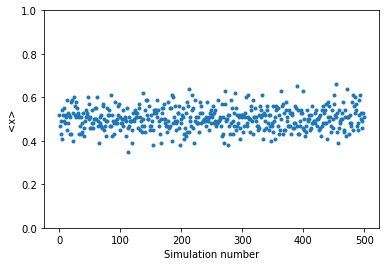

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function that will flip a coin N times and calculate the mean <x>
def coin_flip_simulation(num):
    
    heads = 1
    tails = 0
    options = [heads,tails]
    
    # random.choice(options,num) will return a list of length num, randomly chosen from options
    x_samples = np.random.choice(options,num)
    
    # Calculate <x>
    mean = np.mean(x_samples)
    
    return mean

# Let's perform 500 simulations, each with N=100
num = 100

# Try changing N to see how the scatter in the mean changes

list_of_means = []
for i in range(500):
    list_of_means.append(coin_flip_simulation(num))
    
plt.plot(list_of_means,'.')

plt.xlabel('Simulation number')
plt.ylabel('<x>')
plt.ylim([0,1])
plt.show()
